In this code demo, we will talk about how we can build a simple multilayered perceptron classifier using Python. We will be using a library called keras which will use tensor flow as the backend to build our neural networks.

We will use pandas and numpy to do dataframe and Matrix operations. We will use matplotlib to plot our data and some of our neural network results, we will also use OS module to set our working directory.

In [1]:
import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\VK\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# data_dir='E:\Work\Machine Learning Course\Python\Module 5 Neural Networks\Data'
# os.chdir(data_dir)

In [3]:
# train_x=pd.read_csv("fashion_train.csv",header=0)
# train_y=pd.read_csv("fashion_train_labels.csv",header=0)
# test_x=pd.read_csv("fashion_test.csv",header=0)
# test_y=pd.read_csv("fashion_test_labels.csv",header=0)

In [4]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
xtrain = train.drop('label', axis=1)
ytrain = train['label']

In [8]:
xtest = test.drop('label', axis=1)
ytest = test['label']

In [9]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [10]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [11]:
print(xtrain.head())

   pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3     0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

   pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
1     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
2     0.0      0.0  ...  0.000000       0.0       0.0  0.117647  0.168627   
3     0.0      0.0  ...  0.011765       0.0       0.0  0.000000  0.000000   
4     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0  0.000000       0.0       0.0 

The data that we have in train_x corresponds to a set of images that have been flattened.

In [12]:
print(ytrain.head())

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64


it looks like each row has a particular class label, so for example row number 1 in our training data set has a class label of 9, row number 2 has a class label of 6, row number 3 has a class label of 0 again, so on and so forth.

now these class labels correspond to what images are there in our data set, so we have images about ten category of objects and these are those categories. So 0 in our data set for a Y label represents a t-shirt or a top, 1 represents a trouser, 2 represents a pullover, so on and so forth.

## These labels are

| Label | Description |
|-------|-------------|
| 0     | T-shirt/Top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |

Lets take a look at the image in the first row of our data. Lets plot it using matplotlib and see what image we have.

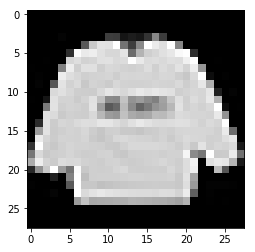

In [13]:
plt.imshow(np.array(xtrain.iloc[0]).reshape((28,28)),cmap='gray')

This seems like an image of a pullover. So similarly, in our dataset, we have 60,000 images corresponding to either a t-shirt, a trouser, a pullover, so on and so forth.

Now, to make our life easier, what we are going to do is we are going to create a dictionary corresponding to the class labels and their descriptions that later on when we do the prediction from our model, it will become relatively easy for us to query what a given class label means. So lets do that.

In [14]:
## Create a dictionary of labels
label_dic={0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',
           7:'Sneaker',8:'Bag',9:'Ankle Boot'}

Now, for keras to work, just like scikit learn, we need to do two things, the first thing that we need to do is, we need to create a predictor matrix and our predictor matrix is going to be our train_x dataframe, this contains the pixel intensities for the images that we have. Also, we need to create a Y matrix . now, if we compare keras with scikit learn, there is a slight difference between how the Y works in both keras and scikit learn. In scikit learn, Y is just a single vector, whereas in keras, the Y has to be a matrix which should have as many columns as there are classes. So let me run this code and show you how our Y looks like.

In [15]:
## Create numpy arrays for predictor matrix and labels
x=np.array(xtrain)
y=keras.utils.to_categorical(np.array(ytrain),10)

In [16]:
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


So this is how our Y looks like, now since in the first row of our data, the class is 2, hence I have 1 corresponding to 2 in my first row. Similarly, in the second row of my data, the class is 9, hence I have 1 corresponding to 9. So we need to create this kind of structure for our Y variable when you are working with keras and this is what this function, keras.utils.to.categorical does.

Now we are ready to build our multilayer perceptron classifier, so the first thing I will do is, I will import an object called sequential and I will also import something called dense and activation. Now lets see what these two terms mean, let us execute this code.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [18]:
model=Sequential()

Sequential is very similar to what we do in scikit learn when we instantiate an instance of a model object, so this simply instantiates our model object. Now within this model object, I create the network architecture

In [19]:
## Create network architecture
model.add(Dense(units=24,input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

so the kind of network that I am working with is, it’s a multilayered perceptron with one hidden layer and one output layer. Now in my first hidden layer, I want 24 neurons and I will also have to specify the input dimension, since if you look at the shape of my X matrix, you will realize that it has 784 columns that is what I am specifying here. So..so this model.add tells me that I have one hidden layer which is a dense layer.

Now dense layer is another name for, or another way of saying that I have a fully connected hidden layer and the activation of all these 24 neurons in this dense layer is a sigmoid activation. Now then I again add a dense layer which is my output layer. Now since I have 10 classes to predict for and this is a multilayer perceptron classifier, hence I should have 10 neurons in my output layer and since this is a classifier, I should have a softmax activation. So lets run this, up untill now, all that has happened is I have simply specified the architecture of my neural network.

Now the next thing I need to do is, I need to compile my model and I need to specify a few parameters over here. One of the parameters that I have to manually specify is, now since I am building a neural network classifier, the appropriate loss will be categorical crossentropy, which I will need to specify for the loss function in the compile method. I will also have to specify the optimizer I will use. Since I will supply batches of my data to do the training, I will in fact be doing a stochastic gradient descent, so this is what I am specifying here and the next thing I am saying is that I will be tracking the accuracy over each epoch of my training. So lets compile our model. After we compile our model, we are ready to fit our model.

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
## for reg, loss='mean_squared_error'; metrics=['mse','mae'] --> refer keras doc

Here I will call the fit method and I will supply my predictor matrix and my target matrix, here I am specifying the number of epochs so I will do the training for this neural network for ten epochs. Remember one epoch is a complete pass over my data, then I will have to specify the batch size. I will be sending batches of 1000 rows for my single forward and a backward pass. And the fit method also allows me to do an out of sample validation of my training process, so this parameter over here tells the fit method to keep 20% of my data to do validation, so lets run this.

In [21]:
history=model.fit(x,y,epochs=10,batch_size=1000,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 45us/step - loss: 2.3333 - acc: 0.1849 - val_loss: 2.2446 - val_acc: 0.2043
Epoch 2/10
48000/48000 [==============================] - 2s 39us/step - loss: 2.1957 - acc: 0.2344 - val_loss: 2.1522 - val_acc: 0.2852
Epoch 3/10
48000/48000 [==============================] - 2s 39us/step - loss: 2.1186 - acc: 0.3223 - val_loss: 2.0846 - val_acc: 0.3887
Epoch 4/10
48000/48000 [==============================] - 3s 67us/step - loss: 2.0560 - acc: 0.4394 - val_loss: 2.0256 - val_acc: 0.4765
Epoch 5/10
48000/48000 [==============================] - 2s 48us/step - loss: 1.9997 - acc: 0.4896 - val_loss: 1.9716 - val_acc: 0.5085
Epoch 6/10
48000/48000 [==============================] - 2s 43us/step - loss: 1.9476 - acc: 0.5146 - val_loss: 1.9210 - val_acc: 0.5286
Epoch 7/10
48000/48000 [==============================] - 2s 37us/step - loss: 1.8987 - acc: 0.5323 - val_loss: 1.8734 - val_acc

In [ ]:
# ## Epoch-level methods (training only)
# on_epoch_begin(self, epoch, logs=None)
# Called at the beginning of an epoch during training.

# on_epoch_end(self, epoch, logs=None)
# Called at the end of an epoch during training.

Now the training usually will take some time depending upon how many epochs you want to train and what is your batch size and the time that the training takes will also depend upon what kind of computer you are using.

In [22]:
# p=model.predict(np.array(xtest.loc[8]).reshape(1,784))

Now I will use predict_probability method to come up with a prediction from my model. I will be supplying only one row of my data which is the first row..lets do that. Lets see what p contains

In [23]:
p=model.predict_proba(np.array(xtest.loc[0]).reshape(1,784))

In [24]:
p

array([[0.2201476 , 0.11470044, 0.0826533 , 0.10975358, 0.09696154,
        0.07613995, 0.13564093, 0.0299709 , 0.08122647, 0.0528054 ]],
      dtype=float32)

p contains the probability that this row belongs to class0, class1, class2, class3 and so on. Let us figure out where the maximum value of probability occurs in this particular predicted vector of probabilities.

The maximum values occurs for a label corresponding to index 0. 

In [25]:
np.argmax(p)

0

Lets see what is corresponding to index 0 in our data. 

In [26]:
label_dic[0]

'T-shirt/Top'

So index 0 corresponds to T-shirt/Top. Lets visualize our first row of test data and see what is contained in there.

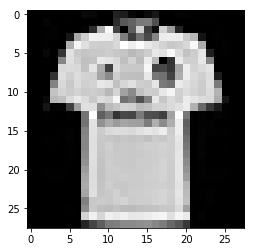

In [27]:
plt.imshow(np.array(xtest.loc[0]).reshape((28,28)),cmap='gray')

Lets do a prediction for the 9th row in our data which is the 9th image and lets figure out at which index do we have the highest probability

In [28]:
p=model.predict_proba(np.array(xtest.loc[8]).reshape(1,784))

In [29]:
np.argmax(p)

5

In [30]:
label_dic[5]

'Sandal'

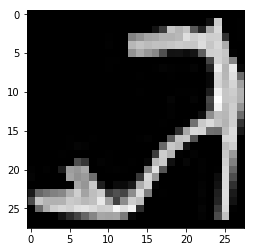

In [31]:
plt.imshow(np.array(xtest.loc[8]).reshape((28,28)),cmap='gray')

You may get a wrong label - because when you see the validation accuracy is only around 67.44% after model run. 

Now I have taken a very simple architecture over here for the demonstration purposes and with this architecture over this data set, I was able to achieve a validation accuracy of 70%.
Now you can experiment with different layers in your architecture to improve the accuracy of your model.

Now another thing that we can do is we can plot the training and validation accuracy across all our epochs. This is what I am doing here.

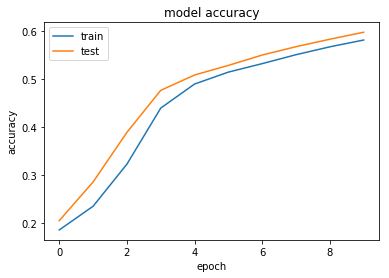

In [32]:
## Check for overfit
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

If you remember while fitting my model, I had stored the output of the fit in an object called history and using this object and matplotlib, I am creating this visual which corresponds to my model accuracy across different epochs on my train and test data.

I can also look at how my loss changes across different epochs

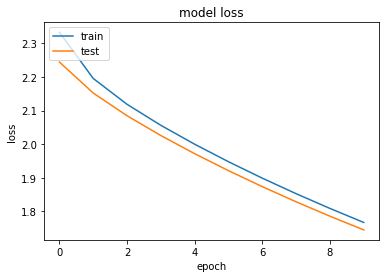

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Regularization in MLP

In this code demo we’ll talk about how we can introduce regularization using L1 norm, L2 norm and dropout layers in a multi layered perceptron.

we’ll import L1 and L2 modules from the regularizers module.


In [34]:
from keras.regularizers import l1,l2

In [35]:
## Introduce Regularisation
model=Sequential()
model.add(Dense(units=40,input_dim=784,kernel_regularizer=l1(0.001)))
model.add(Activation('sigmoid'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

This is how we introduce regularization when we create the network architecture then at that point in time we tell what kind of regularization we’ll be working with. So, here I am putting in an L1 regularization. Now, this value is the value of our penalty term lambda. 

Now, if instead I wanted to do an L2 regularization then all I needed to do was put an L2 here instead of L1 here and put in a relevant value of lambda. Now, let’s compile our model.

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

Again since I am trying to create a multi layered perceptron classifier so in the last layer the activation is softmax and the loss that I will be using will be categorical crossentrophy and I am doing gradient descent which will be a batch gradient descent so hence I will use stochastic gradient descent. Let’s compile a model and let’s fit our model. This time I will be doing 30 epochs of a batch size of 1000 and my validation split will be 20 percent of my data.

In [37]:
history=model.fit(x,y,epochs=30,batch_size=1000,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 46us/step - loss: 3.6662 - acc: 0.1111 - val_loss: 3.5584 - val_acc: 0.1588
Epoch 2/30
48000/48000 [==============================] - 2s 38us/step - loss: 3.4935 - acc: 0.2622 - val_loss: 3.4345 - val_acc: 0.3521
Epoch 3/30
48000/48000 [==============================] - 2s 39us/step - loss: 3.3845 - acc: 0.3914 - val_loss: 3.3359 - val_acc: 0.4346
Epoch 4/30
48000/48000 [==============================] - 2s 38us/step - loss: 3.2911 - acc: 0.4764 - val_loss: 3.2470 - val_acc: 0.5147
Epoch 5/30
48000/48000 [==============================] - 2s 39us/step - loss: 3.2056 - acc: 0.5417 - val_loss: 3.1649 - val_acc: 0.5580
Epoch 6/30
48000/48000 [==============================] - 2s 39us/step - loss: 3.1266 - acc: 0.5702 - val_loss: 3.0888 - val_acc: 0.5851
Epoch 7/30
48000/48000 [==============================] - 2s 39us/step - loss: 3.0533 - acc: 0.5901 - val_loss: 3.0182 - val_acc

Now, the time the training process takes will depend upon for how many epochs you run your model, since I am running my model for 30 epochs it takes relatively longer time compared to the time it took when we ran our previous model in the previous demo. Now, the time taken will also depend upon the configuration of your machine.

Let’s take a look at the training and validation accuracy


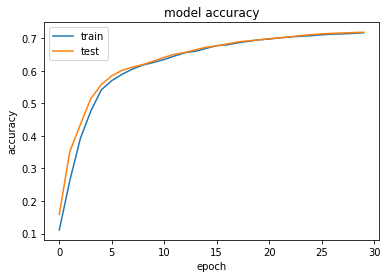

In [38]:
## Check for overfit
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

You can see that both the test and train accuracy closely follow each other and there doesn’t seem to be any evidence of overfit in this case . We can also check our loss

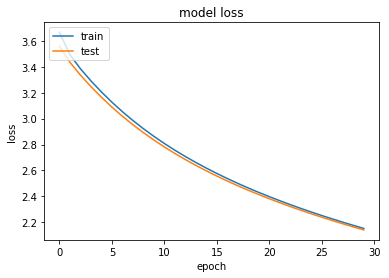

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

the loss of my test and training data is also closely related, there’s not much difference here so there is no evidence of overfit.

Assume that I wanted to work with dropout layers to implement regularization then this is how the code would look like if I had to implement dropout.

In [40]:
## Another way to regularise is to use dropout layer
from keras.layers import Dense, Activation, Dropout
model=Sequential()
## Create network architecture
model.add(Dense(units=40,input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2,seed=100)) ##drop 20% neurons randomly; switch it off
model.add(Dense(units=10))
model.add(Activation('softmax'))

All I need to do is I need to add a dropout layer. Now, I am adding a dropout layer just before my output layer, so the dropouts will occur over my output layer. So, here I am saying that at least 20 percent of the neurons in the succeeding layer should be dropped randomly. So, let’s construct this architecture and let’s compile a model, again since this is a classifier so in the last layer I am using a softmax activation and I am using a categorical crossentrophy loss. Let’s run our model using the fit method. I will run this again for 30 epochs with the batch size of 1000.

In [41]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [42]:
history=model.fit(x,y,epochs=30,batch_size=1000,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 47us/step - loss: 2.3345 - acc: 0.1471 - val_loss: 2.2208 - val_acc: 0.2155
Epoch 2/30
48000/48000 [==============================] - 2s 40us/step - loss: 2.2150 - acc: 0.1998 - val_loss: 2.1371 - val_acc: 0.3367
Epoch 3/30
48000/48000 [==============================] - 2s 40us/step - loss: 2.1402 - acc: 0.2497 - val_loss: 2.0699 - val_acc: 0.4402
Epoch 4/30
48000/48000 [==============================] - 2s 39us/step - loss: 2.0809 - acc: 0.2940 - val_loss: 2.0088 - val_acc: 0.5015
Epoch 5/30
48000/48000 [==============================] - 2s 41us/step - loss: 2.0217 - acc: 0.3393 - val_loss: 1.9512 - val_acc: 0.5413
Epoch 6/30
48000/48000 [==============================] - 2s 41us/step - loss: 1.9617 - acc: 0.3811 - val_loss: 1.8963 - val_acc: 0.5736
Epoch 7/30
48000/48000 [==============================] - 3s 58us/step - loss: 1.9119 - acc: 0.4069 - val_loss: 1.8441 - val_acc

look at the training and validation accuracy and also look at the loss.

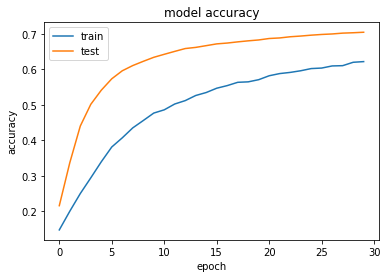

In [43]:
## Check for overfit
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

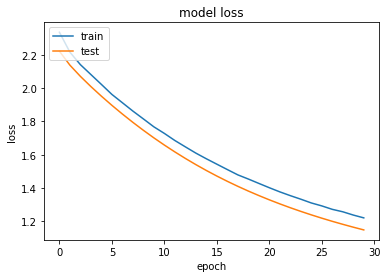

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

if we look at the loss curve, you can see that the test set has a lower loss compared to the training set and the difference in this loss is not increasing as the number of epochs increase, again suggesting that there is no overfit happening here.

### GridSearchCV

In this code demo we’ll talk about how we can do grid search using Scikit Learn interface to keras.

Now to do grid search, we will make use of keras interface with Scikit Learn and if you remember, in Scikit Learn we have GridSearchCV option to do grid search. So to connect keras to GridSearchCV, we will have to import wrappers.scikitlearn module and within this module we have a kerasClassifier class.

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier

Now, to create an interface with GridSearchCV in Scikit Learn, we first need to create a build function. 

In [46]:
def create_model():
    ## Create network architecture
    model=Sequential()
    model.add(Dense(units=24,input_dim=784))
    model.add(Activation('sigmoid'))
    model.add(Dense(units=10))
    model.add(Activation('softmax'))
    ## Compile Model
    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    return model

Now build function is nothing, all that we are doing is, we are creating our network architecture inside a function and returning the model object. So if you compare this piece of code with the previous two demos, you would realize that all we have done is we have encapsulated the network architecture within a Python function

After this is done we will make use of the keras Classifier class to make sure that the model object that we’ll now obtain will be able to interface with the GridSearchCV of Scikit Learn. So we will need to provide a build function which we’ve already done here and some other parameters such as for how many epochs we want to run this model

In [47]:
## Create Model
model=KerasClassifier(build_fn=create_model,verbose=0,epochs=10)

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
0 shows nothing. 1 shows "=====". 2 shows epoch info

Now for the purpose of this demo, I am doing a grid search on the batch size. So I will create a parameter grid, just like we used to create a parameter grid with Scikit Learn

In [48]:
## Grid Definition
batch_size=[500,1000]
param_grid={'batch_size':batch_size}

In [49]:
from sklearn.model_selection import GridSearchCV

I will specify my model, which is the Multi Layered Perceptron model and I’ll also specify the parameter grid

In [50]:
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid_result=grid.fit(x,y)

Now this grid search may take some time. After the grid search is done, we will take a look at the best parameters

In [51]:
grid_result.best_params_

{'batch_size': 500}

In [52]:
grid_result.best_score_

0.6317833354075749

The best parameter turned out to be a batch size of 500. Remember we were doing a grid search on batch size and we had two options. Now you can make this grid larger but remember this process is computationally very expensive. So the more the parameters that you have to do a grid search on, the more time it will take to compute.

Now let’s say I wanted to do a grid search on the number of neurons in the first layer. Then I will have to specify a different build function.

In [53]:
## Grid Search in the number of neurons
def create_model(neurons=1):
    ## Create network architecture
    model=Sequential()
    model.add(Dense(units=neurons,input_dim=784))
    model.add(Activation('sigmoid'))         
    model.add(Dense(units=10))
    model.add(Activation('softmax'))
    ## Compile Model
    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    return model

Now since I am now doing grid search on a parameter that is part of a neural network architecture, I have to specify an input to this build function. Now this input will be the parameter on which I want to do a grid search. Now in the first layer I do not specify how many neurons I want to work with. I am simply specifying that I want to work with number of neurons = neurons which has been instantiated as 1, but once we create a kerasClassifier object out of this, the GridSearchCV would understand that it will have to provide the grid of neuron values that I will specify to this create model function in this manner and do a grid search on it.

In [54]:
## Create Model
model=KerasClassifier(build_fn=create_model,verbose=0,epochs=10,batch_size=500)

I want to do a grid search over number of neurons in the first layer being 20 or 24.

In [55]:
## Grid Definition
param_grid={'neurons':[20,24]}
## Training
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid_result=grid.fit(x,y)

In [56]:
grid_result.best_params_

{'neurons': 24}

In [57]:
grid_result.best_score_

0.6593999976913134

So it turns out, out of 20 or 24 neurons, 24 is the appropriate number of neurons in the first layer of this neural network architecture. Let’s look at the score obtained on this selected model. 